In [5]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X,Y=make_circles(n_samples=500, shuffle=True, noise=0.05, random_state=1, factor=0.8)

In [6]:
class NeuralNetwork:

    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)

        model = {} #Dictionary

        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))

        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))

        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))

        self.model = model
        self.activation_outputs = None

    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']

        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)

        self.activation_outputs = (a1,a2,y_)
        return y_

    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]

        a1,a2,y_ = self.activation_outputs

        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)

        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)

        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)


        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1

        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2

        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3

        # :)

    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)

    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs

        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [7]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):

    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [8]:
def train(X,Y,model,epochs,learning_rate,logs=True):
  training_loss = []

  classes=2
  Y_OHT = one_hot(Y,classes)

  for ix in range(epochs):

    Y_=model.forward(X)
    l=loss(Y_OHT,Y_)
    training_loss.append(l)
    model.backward(X,Y_OHT,learning_rate)

    if(logs):
      print("Epoch %d loss %.4f"%(ix,l))

  return training_loss

In [10]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)
model.forward(X)
model.summary()

W1  (2, 10)
A1  (500, 10)


In [11]:
losses=train(X,Y,model,500,0.001)

Epoch 0 loss 0.3584
Epoch 1 loss 0.3458
Epoch 2 loss 0.3441
Epoch 3 loss 0.3427
Epoch 4 loss 0.3414
Epoch 5 loss 0.3402
Epoch 6 loss 0.3390
Epoch 7 loss 0.3378
Epoch 8 loss 0.3365
Epoch 9 loss 0.3353
Epoch 10 loss 0.3340
Epoch 11 loss 0.3327
Epoch 12 loss 0.3314
Epoch 13 loss 0.3300
Epoch 14 loss 0.3286
Epoch 15 loss 0.3271
Epoch 16 loss 0.3255
Epoch 17 loss 0.3240
Epoch 18 loss 0.3223
Epoch 19 loss 0.3206
Epoch 20 loss 0.3189
Epoch 21 loss 0.3170
Epoch 22 loss 0.3151
Epoch 23 loss 0.3132
Epoch 24 loss 0.3112
Epoch 25 loss 0.3091
Epoch 26 loss 0.3069
Epoch 27 loss 0.3047
Epoch 28 loss 0.3025
Epoch 29 loss 0.3002
Epoch 30 loss 0.2978
Epoch 31 loss 0.2954
Epoch 32 loss 0.2931
Epoch 33 loss 0.2906
Epoch 34 loss 0.2882
Epoch 35 loss 0.2858
Epoch 36 loss 0.2834
Epoch 37 loss 0.2810
Epoch 38 loss 0.2786
Epoch 39 loss 0.2762
Epoch 40 loss 0.2738
Epoch 41 loss 0.2714
Epoch 42 loss 0.2690
Epoch 43 loss 0.2667
Epoch 44 loss 0.2643
Epoch 45 loss 0.2620
Epoch 46 loss 0.2597
Epoch 47 loss 0.2573
Ep

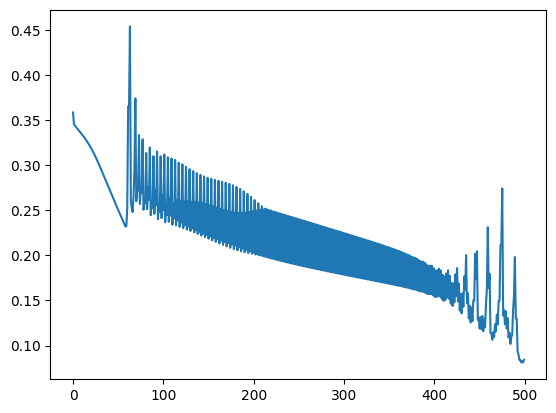

In [12]:
plt.plot(losses)

In [13]:
outputs = model.predict(X)

In [16]:
training_accuracy=np.sum(outputs==Y)/Y.shape[0]
print(training_accuracy)

0.944
